# Generate theoretical modes

See Supplementary Information Section 2.1

Requires:
* Numpy
* Matplotlib
* pyMMF (our custom made library to simulate multimode fiber modes available [here](https://github.com/wavefrontshaping/pyMMF)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyMMF
from functions import colorize

## Parameters

In [2]:
NA = 0.2
radius = 25 # in microns
areaSize = 2.4*radius # calculate the field on an area larger than the diameter of the fiber
n_points_modes = 256 # resolution of the window
n1 = 1.45 # index of refraction at r=0 (maximum)
wl = 1.55 # wavelength in microns
curvature = None
k0 = 2.*np.pi/wl

r_max = 3.2*radius
npoints_search = 2**8
dh = 2*radius/npoints_search

## Simulate a graded index fiber

In [3]:
def get_modes(npoints):
    profile = pyMMF.IndexProfile(npoints = npoints, areaSize = areaSize)
    profile.initParabolicGRIN(n1=n1,a=radius,NA=NA)

    solver = pyMMF.propagationModeSolver()
    solver.setIndexProfile(profile)
    solver.setWL(wl)
    modes = solver.solve(mode='radial',
                        curvature = None,
                        r_max = r_max, # max radius to calculate (and first try for large radial boundary condition)
                        dh = dh, # radial resolution during the computation
                        min_radius_bc = 1.5, # min large radial boundary condition
                        change_bc_radius_step = 0.95, #change of the large radial boundary condition if fails 
                        N_beta_coarse = 1000, # number of steps of the initial coarse scan
                        degenerate_mode = 'exp',
                        )
    return modes

modes = get_modes(n_points_modes)

2021-03-01 21:24:56,783 - pyMMF.core [DEBUG  ]  Debug mode ON.
2021-03-01 21:24:56,799 - pyMMF.solv [INFO   ]  Found 5 radial mode(s) for m=0
2021-03-01 21:24:56,799 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 1
2021-03-01 21:24:56,872 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:24:56,873 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:24:56,873 - pyMMF.solv [WARNING]  Retrying by changing r_max to 3.03a
2021-03-01 21:24:56,942 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:24:56,942 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:24:56,943 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.88a
2021-03-01 21:24:57,020 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:24:57,021 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 

2021-03-01 21:24:58,814 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:24:58,815 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:24:58,815 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.60a
2021-03-01 21:24:58,885 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:24:58,885 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:24:58,886 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.47a
2021-03-01 21:24:58,949 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:24:58,949 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:24:58,950 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.35a
2021-03-01 21:24:59,017 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:24:59,018 - pyMMF.solv [WARNING]  B

2021-03-01 21:25:00,686 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.88a
2021-03-01 21:25:00,752 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:00,752 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:00,753 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.74a
2021-03-01 21:25:00,815 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:00,816 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:00,816 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.60a
2021-03-01 21:25:00,878 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:00,878 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:00,879 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.47a
2021-03-01 21:25:00,945 - pyMMF.solv [WARNING]  maximum recursion depth exce

2021-03-01 21:25:02,561 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:02,562 - pyMMF.solv [WARNING]  Retrying by changing r_max to 1.82a
2021-03-01 21:25:02,619 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:02,620 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:02,620 - pyMMF.solv [WARNING]  Retrying by changing r_max to 1.72a
2021-03-01 21:25:02,680 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:02,680 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:02,681 - pyMMF.solv [WARNING]  Retrying by changing r_max to 1.64a
2021-03-01 21:25:02,697 - pyMMF.solv [INFO   ]  Searching propagation constant for |l| = 2
2021-03-01 21:25:02,761 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:02,762 - pyMMF.solv [WARNING]  Boundary condition co

2021-03-01 21:25:04,489 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:04,489 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:04,490 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.88a
2021-03-01 21:25:04,554 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:04,555 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:04,555 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.74a
2021-03-01 21:25:04,616 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:04,616 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:04,617 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.60a
2021-03-01 21:25:04,678 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:04,679 - pyMMF.solv [WARNING]  B

2021-03-01 21:25:06,429 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:06,429 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:06,429 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.74a
2021-03-01 21:25:06,490 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:06,491 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:06,491 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.60a
2021-03-01 21:25:06,554 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:06,555 - pyMMF.solv [WARNING]  Boundary condition could not be met.
2021-03-01 21:25:06,555 - pyMMF.solv [WARNING]  Retrying by changing r_max to 2.47a
2021-03-01 21:25:06,618 - pyMMF.solv [WARNING]  maximum recursion depth exceeded while calling a Python object
2021-03-01 21:25:06,618 - pyMMF.solv [WARNING]  B

## Show some modes

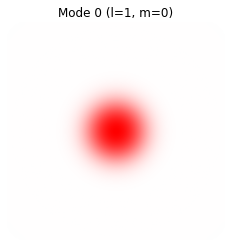

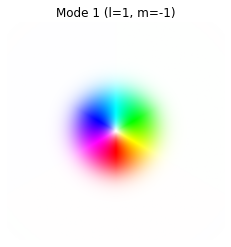

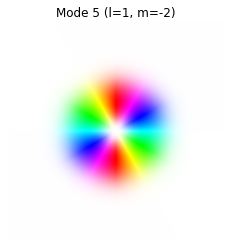

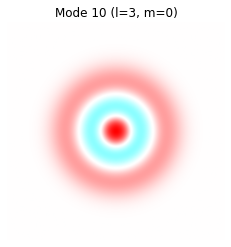

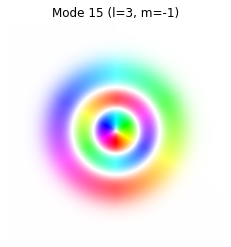

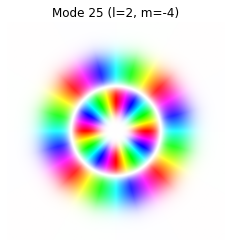

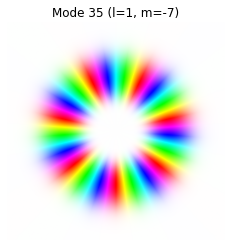

In [4]:
i_modes = [0,1,5,10,15,25,35]

M0 = modes.getModeMatrix()

for i in i_modes:
    Mi = M0[...,i]
    profile = Mi.reshape([n_points_modes]*2)
    plt.figure(figsize = (4,4))
    plt.imshow(colorize(profile,'white'))
    plt.axis('off')
    plt.title(f'Mode {i} (l={modes.l[i]}, m={modes.m[i]})')
    # save figure
    # plt.savefig(f'mode_{i}.svg')
    